# Scientific Programming & Visualization

## Arrays

Python's dynamic typing makes it extremely flexible, but this flexibility comes at a cost.

Python's built in types are often cleverly disguised C structures containing the data associated with the object as well as header information.

Every Python `object` has a header:

- `ob_refcnt`: reference count used for garbage collection
- `ob_type`: type of the object (how to interpret underlying bytes)
- `obj_size`: size of data in bytes

Lists (for example) are extremely flexible and can hold any `object`, we've said these things are in adjacent memory, but how does that work if the items are a different size?

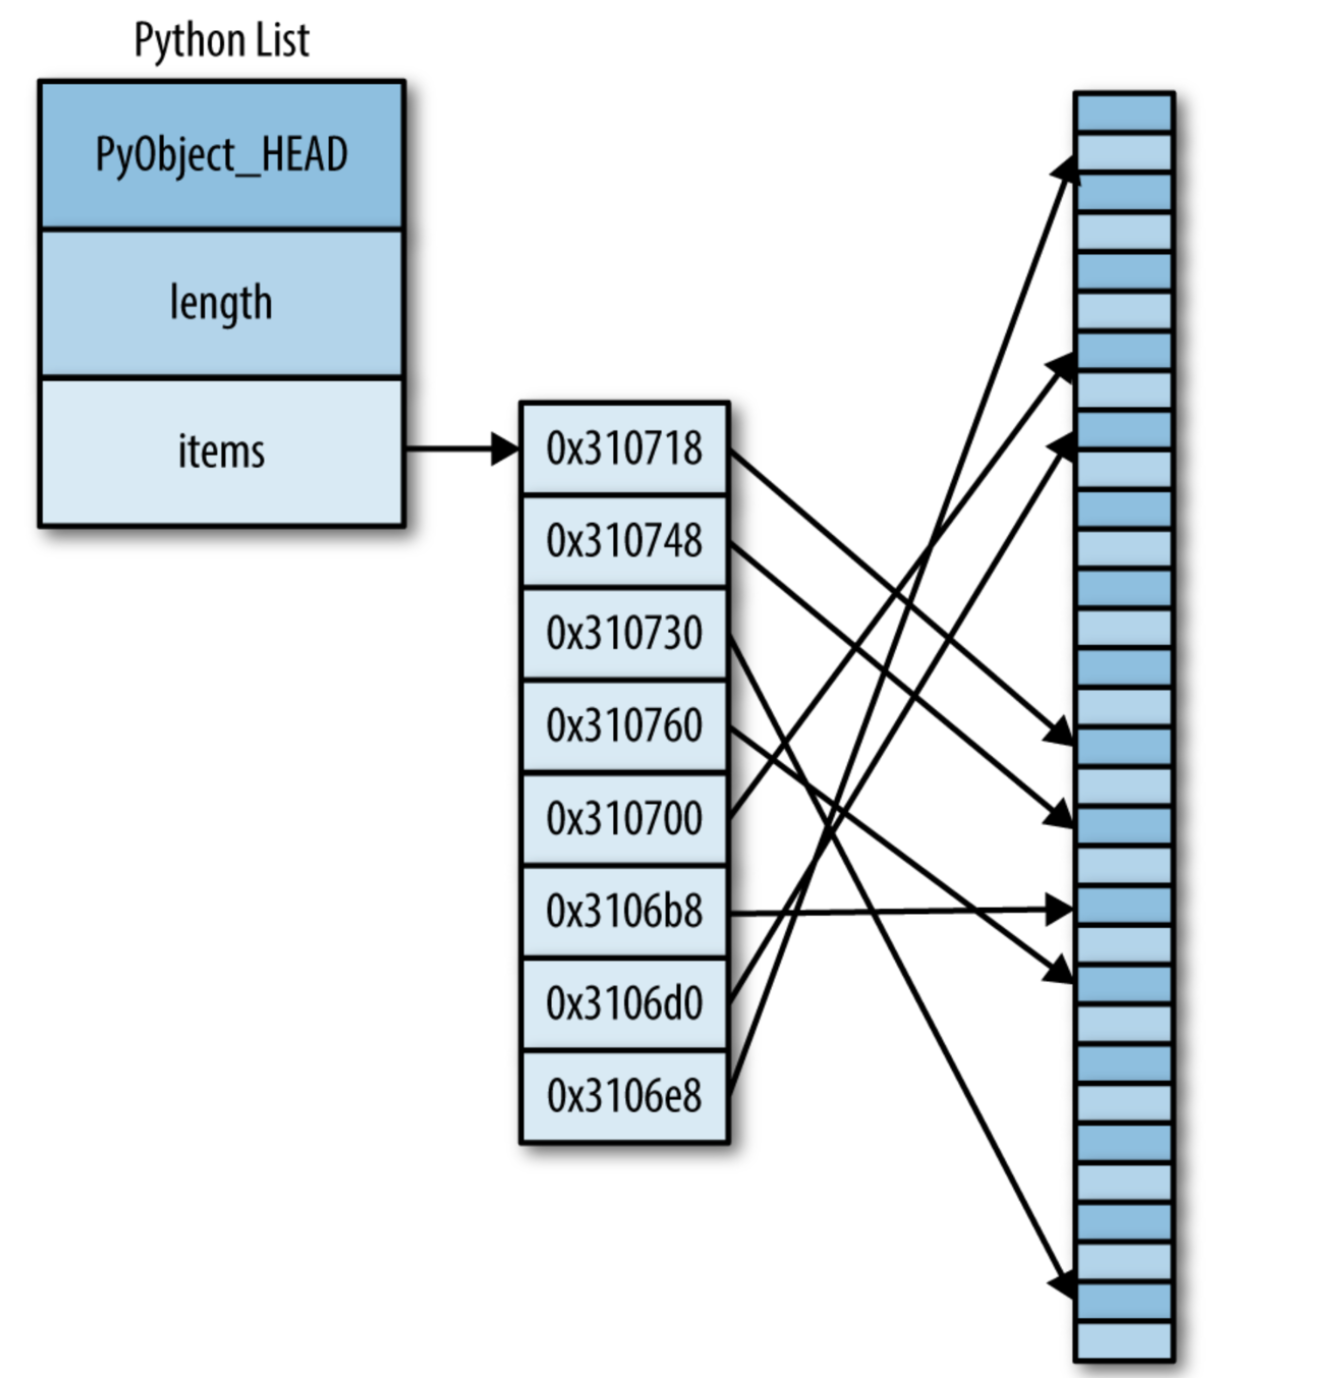

Lookups are still O(1), but there is an extra level of indirection, as we've discussed.

### `array` module

Allows us to create dense, **homogenous** arrays without indirection. 

Unlike `list` (and virtually everything else) we actually need to declare a type when doing so.


In [7]:
import array

# array of 10 integers
int_ar = array.array("i", range(10))
float_ar = array.array("f", range(10))
print(int_ar)
print(float_ar)

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])


## NumPy Arrays

Python's `array` object provides efficient storage on array-based data, **NumPy** adds efficient operations on that data as well as a nicer interface.

NumPy will upcast data if there is data of different types in a single array.  For example:

In [13]:
import numpy as np
print(np.array([1, 2, 3, 4, 5]))  
print(np.array([1, 2, 3, 4., 5]))  # one float will make the entire array floats

[1 2 3 4 5]
[1. 2. 3. 4. 5.]


In [15]:
# you can also specify the type via `dtype`
print(np.array([1, 2, 3, 4, 5], dtype="float32"))  
# all types: https://numpy.org/doc/stable/user/basics.types.html

[1. 2. 3. 4. 5.]


NumPy arrays are multidimensional.  The arrays we've seen are just a special case with one axis.

- **axes**: In NumPy dimensions are usually called axes.
- **rank**: Number of axes in a given array.
- **length**: number of elements in a given axis.
- **shape**: size of array in each axis, given as a tuple.
- **size**: total number of elements in entire array (all axes).
- **itemsize**: Size in bytes of each element in array.
- **data**: Underlying buffer used to store data, generally not accessed directly.

In [18]:
a = np.array([[1, 2, 3], [4, 5, 6]], dtype="float64")
print(a[0, 1])  # Note: multidimensional access, different from m[0][1]

2.0

In [19]:
a[0, :]  # entire row

array([1., 2., 3.])

In [20]:
a[:, 0] # entire column

array([1., 4.])

In [34]:
print('rank =', len(a.shape))
print('shape =', a.shape)
print('size =', a.size)
print('itemsize =', a.itemsize)
print('data =', a.data)

rank = 2
shape = (2, 3)
size = 6
itemsize = 8
data = <memory at 0x1060a4c70>


### Creating numpy arrays
- `numpy.zeros / numpy.ones`  -- create array with given shape filled with 0 or 1
- `numpy.full` -- create array with given value
- `numpy.arange` -- similar to range, step by a given value
- `numpy.linspace` -- array of values between two endpoints, evenly spaced
- `numpy.random.random` -- random values between 0 and 1
- `numpy.random.normal` -- normally distributed random values centered on 0 w/ std.dev 1
- `numpy.eye` -- identity matrix of a given size

In [36]:
np.zeros((4, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [37]:
np.ones((3, 3, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [38]:
np.full((7, 4), np.pi)

array([[3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265],
       [3.14159265, 3.14159265, 3.14159265, 3.14159265]])

In [40]:
np.random.random((3, 3))

array([[0.3635647 , 0.5151762 , 0.80516094],
       [0.64958057, 0.2815319 , 0.84686499],
       [0.31906471, 0.03104397, 0.86650597]])

In [42]:
np.eye(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [54]:
np.linspace(0, 6, 5)   # divides space [0,6] into 5 equally-sized increments

array([0. , 1.5, 3. , 4.5, 6. ])

### Reshaping NumPy Arrays

Allows us to reinterpret the existing memory as a different shape.  Must be the same total size.

`reshape` - reshape to new dimensions

`ravel` - flatten to rank 1

`T` - transpose (note: property, not method)

`resize` - reshape in place

In [57]:
ta = np.array([range(4), range(4, 8)])
print(ta)

[[0 1 2 3]
 [4 5 6 7]]


In [60]:
ta.reshape(4, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [62]:
ta.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [64]:
ta.T  # note this is a property

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [66]:
ta.resize(4, 2)   # modifies ta in-place (no return value, but ta is modified)

### Additional NumPy Array Manipulation Operations

- split/hsplit/vsplit/dsplit
- roll
- rot90
- tile
- repeat
- stack/hstack/vstack/dstack
- dozens more

https://numpy.org/doc/stable/reference/routines.array-manipulation.html

### Performance

Python's flexibility comes with costs. Python has a reputation for slowness in some contexts. Other implementations of the Python interpreter attempt to overcome some of the default implementation's shortcomings (e.g., Cython, PyPy, Numba).

"The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated—for instance, looping over arrays to operate on each element."

"It turns out that the bottleneck... is not the operations themselves, but the type- checking and function dispatches that CPython must to at each cycle of the loop." (This is where compiled code has an advantage.)

(Source: Python Data Science Handbook, Jake VanderPlas)

Solution: *vectorized* functions via *ufuncs* that circumvent problems of this nature.

Ufuncs "quickly execute repeated operations on values in NumPy arrays."  They are always more efficient than pure-Python loop based counterparts, with bigger advantages the larger data grows.

Loops occur in the C-layer, instead of the Python layer, so bypass type checking, dunder lookups, and other overhead.

In [87]:
### Array Arithmetic

a = np.arange(4)

print("-a      =", -a)
print("a ** 2  =", a ** 2)
print("a % 2   =", a % 2)
print("a + 5   =", a + 5)
print("a / 2   =", a / 2)
print("a > 1   =", a > 1)

print("-0.5 * (a + 1) ** 2   =", -0.5 * (a + 1) ** 2 )  # can combine multiple into one expression

-a      = [ 0 -1 -2 -3]
a ** 2  = [0 1 4 9]
a % 2   = [0 1 0 1]
a + 5   = [5 6 7 8]
a / 2   = [0.  0.5 1.  1.5]
a > 1   = [False False  True  True]
-0.5 * (a + 1) ** 2   = [-0.5 -2.  -4.5 -8. ]


### UFuncs

Used by dunder methods on `np.array`:

- `np.add`
- `np.subtract`
- `np.negative`
- `np.divide`
- `np.power`
- `np.mod`
- `np.equal`
- `np.less`
- `np.greater_equal`
- etc.

Others: 
- `np.sin`, `np.cos`, etc.
- `np.exp`
- `np.log2`
- `np.log10`

https://numpy.org/doc/stable/reference/ufuncs.html

https://docs.scipy.org/doc/scipy/reference/special.html

### NumPy Aggregation Functions

- `np.sum`
- `np.min`
- `np.max`
- `np.mean`
- `np.std`
- `np.percentile`
- `np.median`



In [80]:
r = np.random.random(10)
print(r)

[0.92695178 0.40005416 0.44131384 0.63862912 0.96365042 0.3928244
 0.52328208 0.08548412 0.03405317 0.26710317]


In [82]:
np.mean(r)

0.4673346254800639

In [81]:
np.percentile(r, 25)

0.2985334795434804

### Broadcasting

Binary operations on arrays of the same size are performed element-wise.

Broadcasting allows us to perform binary operations on arrays of different sizes. We can think of the operation "broadcasting" the smaller array across the larger array.

We saw this with scalars in the first examples of binary operations on ndarrays. (Think of a scalar as a zero-dimensional array.)

In [5]:
import numpy as np
a = np.arange(4)
b = np.ones((3, 4))
print(a)
print("+")
print(b)
print("=")
print(a+b)

[0 1 2 3]
+
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
=
[[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


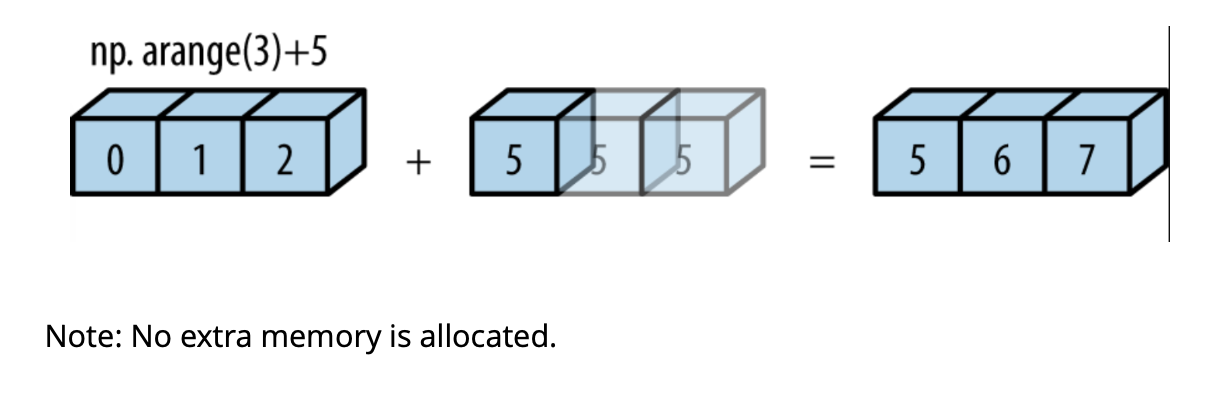

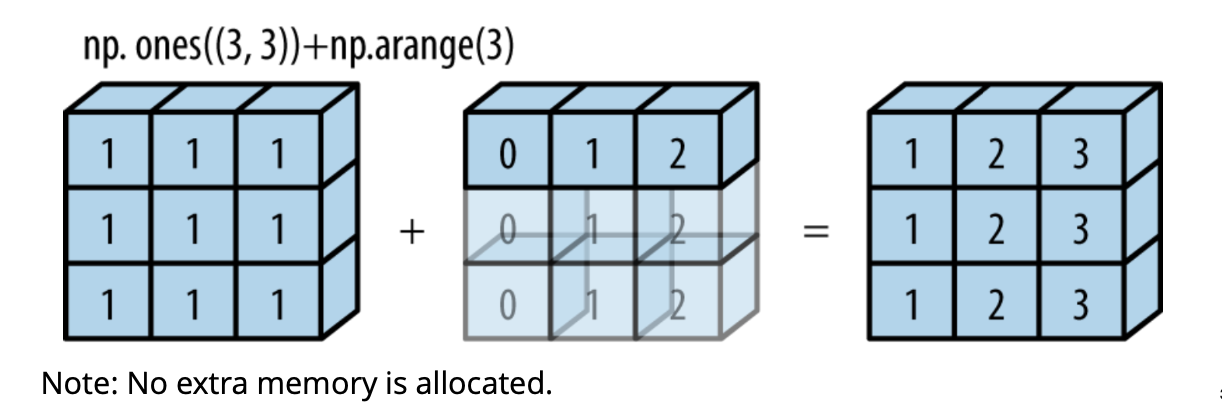

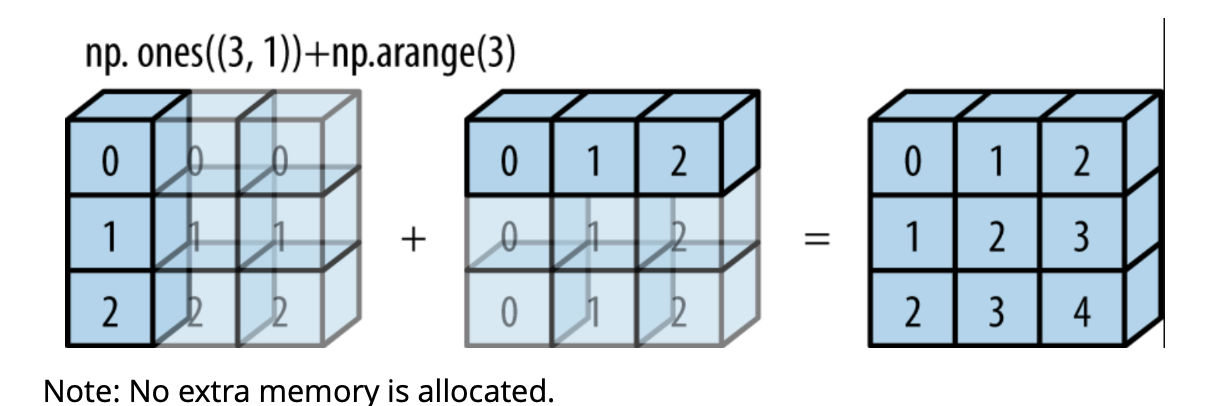

#### Rules of Broadcasting

**Rule 1**

If two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

**Rule 2**

If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

**Rule 3**

If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Other NumPy Features

https://numpy.org/doc/stable/reference/routines.html

## Pandas

Pandas builds on the structured data tools available in NumPy by giving us a data structure called a DataFrame, which acts as a multidimensional array with row and column labels, heterogeneous types, and/or missing data.

"As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs."

*Source: Python Data Science Handbook, Jake VanderPlas*

### Series

A **Series** is a one-dimensional array of indexed data. It wraps:

- A sequence of values (accessible via values attribute). 
- A sequence of indices (accessible via index attribute).



In [8]:
import pandas as pd  # conventional name

data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [9]:
print(data.index)
print(data.values)

RangeIndex(start=0, stop=4, step=1)
[0.25 0.5  0.75 1.  ]


#### Series Indices

We may consider a Pandas Series object as a generalized NumPy array. Whereas a NumPy array has an implicit integer index, a Pandas Series has an explicit index that may consist of values of any type.

Also, there is no requirement that an index be sequential.

In [12]:
pd.Series(np.linspace(0.25, 1.0, 4), index=['a', 'b', 'c', 'd'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [13]:
pd.Series(np.linspace(0.25, 1.0, 4), index=[2, 3, 5, 7])

2    0.25
3    0.50
5    0.75
7    1.00
dtype: float64

We may also consider a Pandas Series a specialized dictionary. Whereas a Python dict maps a set of arbitrary keys to a set of arbitrary values, a Series maps a set of typed keys to a set of typed values.

"This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type of information of a Pandas Series makes it more efficient than a Python dictionary for certain operations."

*Source: Python Data Science Handbook, Jake VanderPlas*

In [14]:
cubs_hr = {'Rizzo': 32, 'Schwarber': 30, 'Bryant': 29, 'Contreras': 21}
cubs_hr_series = pd.Series(cubs_hr)
cubs_hr_series

Rizzo        32
Schwarber    30
Bryant       29
Contreras    21
dtype: int64

Series are always ordered, this means you can slice using the indices (something you can't do with dictionaries):

In [16]:
cubs_hr_series["Schwarber":"Bryant"]

Schwarber    30
Bryant       29
dtype: int64

#### Constructor

Series can be constructed from:
    
- Lists, NumPy arrays: index defaults to sequence of integers. 
- Dictionaries: index defaults to keys of the dictionary. 
- Scalars: value repeated to fill given index.

In [17]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

### DataFrame

"If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names."

"Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by 'aligned' we mean that they share the same index."

Another way to frame our understanding of the `DataFrame` object is to consider it a specialized dictionary. Whereas a dictionary maps arbitrary keys to arbitrary values, a `DataFrame` maps a column name to a `Series` of column data.

(Because the __getitem__ behavior of a DataFrame returns a column, our conceptualization of the DataFrame as a two-dimensional ndarray may be misleading. For this reason, the specialized dictionary conceptualization is preferable.)

*Source: Python Data Science Handbook, Jake VanderPlas*

A DataFrame has attributes:

- index: An Index object. The values are the row/index labels.
- columns: An index object. The values are the column labels.

In [22]:
hr_dict = {'Rizzo': 32, 'Schwarber': 30,
            'Bryant': 29, 'Contreras': 21}
avg_dict = {'Rizzo': .273, 'Schwarber': .211,
            'Bryant': .295, 'Contreras': .276}
hr = pd.Series(hr_dict)
avg = pd.Series(avg_dict)
cubs = pd.DataFrame({'home_runs': hr, 'batting_average': avg})
print(cubs)

           home_runs  batting_average
Rizzo             32            0.273
Schwarber         30            0.211
Bryant            29            0.295
Contreras         21            0.276


In [23]:
cubs   # Jupyter notebook formats dataframes' __repr__ nicely for us

,home_runs,batting_average
Rizzo,32,0.273
Schwarber,30,0.211
Bryant,29,0.295
Contreras,21,0.276


#### Indexing & Selection

In [31]:
data = pd.Series(np.linspace(.25, 1, 4), index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [33]:
print(data["b"])  # index by name or position
print(data[1])

0.5
0.5


In [39]:
print(data["b":"c"])  # can slice by either as well
print(data[1:3])  

b    0.50
c    0.75
dtype: float64
b    0.50
c    0.75
dtype: float64


In [44]:
data[(data > 0.3) & (data < 0.8)]   # masking

# each conditional creates a boolean Series
print((data > 0.3))

a    False
b     True
c     True
d     True
dtype: bool


In [45]:
print((data < 0.8))

a     True
b     True
c     True
d    False
dtype: bool


In [49]:
# we can use the bitwise-and (&) operator to combine the two
selection = (data < 0.8) & (data > 0.3)
print(selection)

a    False
b     True
c     True
d    False
dtype: bool


In [50]:
# finally, we index the Series with True/False values indicating which keys we want to include
data[selection]   # masking


b    0.50
c    0.75
dtype: float64

In [51]:
# this is an incredibly powerful tool, consider the alternative implementation
# likely iterating through a list of dictionaries (possibly multi-dimensional)
# multiple times in Python

#### DataFrame indexing

In [54]:
cubs = pd.DataFrame({'at_bats': {'Rizzo': 572, 'Bryant': 549, 'Baez': 469, 'Zobrist': 435}, 'hits': {'Rizzo': 156, 'Bryant': 162, 'Baez': 128, 'Zobrist': 101}})
cubs

,at_bats,hits
Rizzo,572,156
Bryant,549,162
Baez,469,128
Zobrist,435,101


In [57]:
# computing a new column
cubs["avg"] = cubs["hits"] / cubs["at_bats"]
cubs

,at_bats,hits,avg
Rizzo,572,156,0.272727
Bryant,549,162,0.295082
Baez,469,128,0.272921
Zobrist,435,101,0.232184


In [62]:
cubs["at_bats"] # columns

Rizzo      572
Bryant     549
Baez       469
Zobrist    435
Name: at_bats, dtype: int64

In [63]:
cubs.loc["Rizzo"]  # rows

at_bats    572.000000
hits       156.000000
avg          0.272727
Name: Rizzo, dtype: float64

In [65]:
cubs.loc["Rizzo", "at_bats"]   # row, col

572

In [67]:
cubs.iloc[0]    # row (integer-based)

at_bats    572.000000
hits       156.000000
avg          0.272727
Name: Rizzo, dtype: float64

In [70]:
cubs.iloc[0,2]  # row, col (integer-based)

0.2727272727272727

### Additional Information

https://pandas.pydata.org/docs/reference/series.html

https://pandas.pydata.org/docs/reference/frame.html

DataFrames support the vectorized math of NumPy arrays, with additional features and named indices.

## matplotlib

https://matplotlib.org/stable/plot_types/index.html


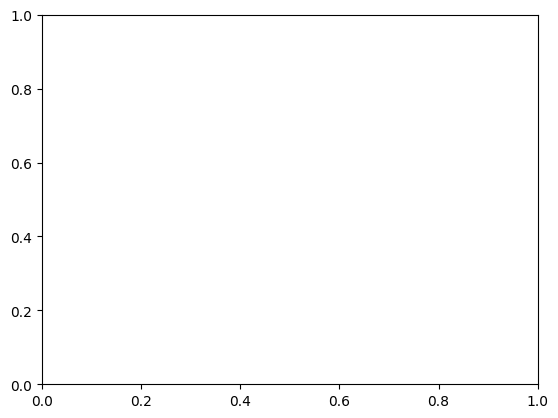

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

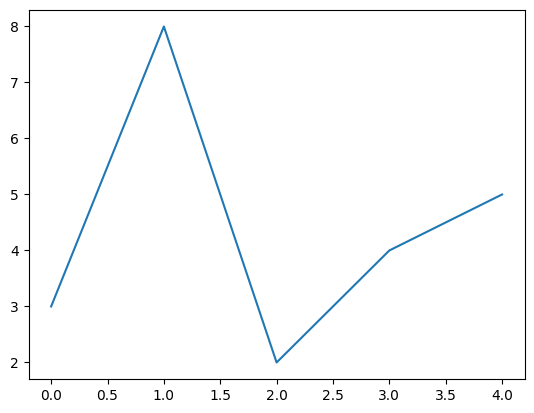

In [110]:
fig, ax = plt.subplots() # begin a plot, we'll mostly use the 'ax' object

# various functions on 'ax' to plot data, 'plot', 'bar', 'pie', etc.
# if just one list is passed, will be used as Y axis
ax.plot([3, 8, 2, 4, 5])
plt.show()

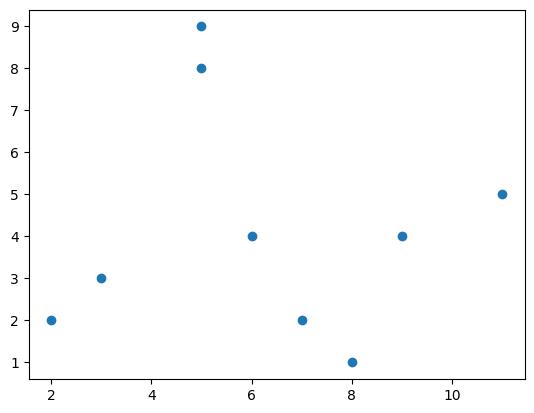

In [115]:
fig, ax = plt.subplots()

# if two are passed, they will be X and Y  (for 2D plot types)
ax.scatter([3, 5, 7, 9, 11, 8, 6, 2, 5], [3, 8, 2, 4, 5, 1, 4, 2, 9])
plt.show()

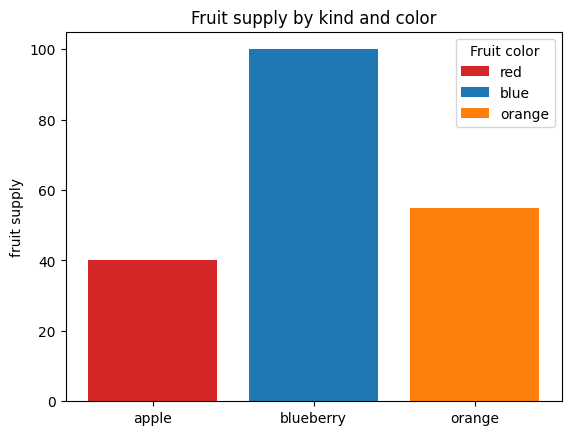

In [107]:
fig, ax = plt.subplots()
fruits = ['apple', 'blueberry', 'orange']
counts = [40, 100, 55]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

# each graph type has a large suite of additional options
ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

# we can call other functions to add labels, axes, etc. to graph
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

Matplotlib is incredibly flexible, with an enormous API.

Often easiest to use the gallery: 

https://matplotlib.org/stable/gallery/index.html

Find a graph similar to the one you want and modify from there.

## seaborn

Uses `matplotlib`, and has features built to be compatible with `pandas`.

Also comes with nice themes/default behaviors.

https://seaborn.pydata.org/examples/index.html

In [8]:
import seaborn as sns
import pandas as pd
#sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

In [9]:
fmri # a DataFrame

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


<AxesSubplot: xlabel='timepoint', ylabel='signal'>

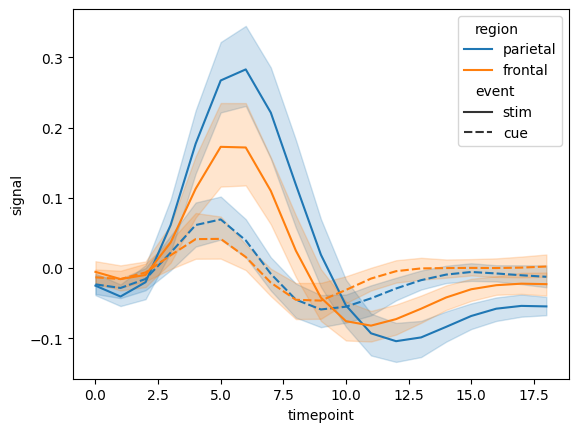

In [10]:
# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

# notice how the data was intepreted using the types in the dataframe

In [11]:
import itertools
implementations = ("list", "queue")
languages = ("C", "Python")
num_entries = (100, 10000, 1000000)
times = [0.1, 1, 10, 1, 3, 23, 0.008, 0.3, 2.4, 0.1, 0.5, 4]
#print(list(itertools.product(implementations, languages, num_entries)))
stats = [(*tup, time) for tup, time in zip(itertools.product(implementations, languages, num_entries), times)]

stats_df = pd.DataFrame(stats, columns=["datatype", "language", "runs", "time"])

### sns.lineplot

https://seaborn.pydata.org/generated/seaborn.lineplot.html

<AxesSubplot: >

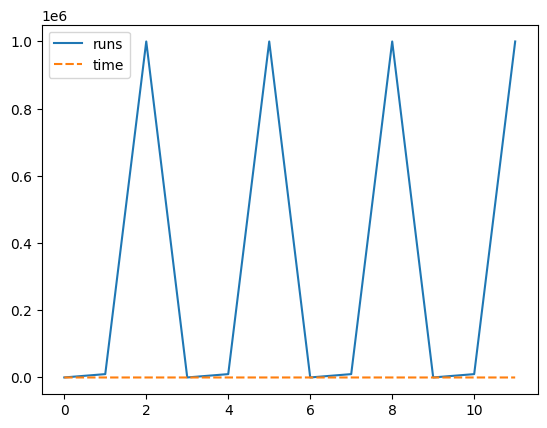

In [12]:
# start with giving the plot some data
sns.lineplot(data=stats_df)

# not really what we want...

<AxesSubplot: xlabel='runs', ylabel='time'>

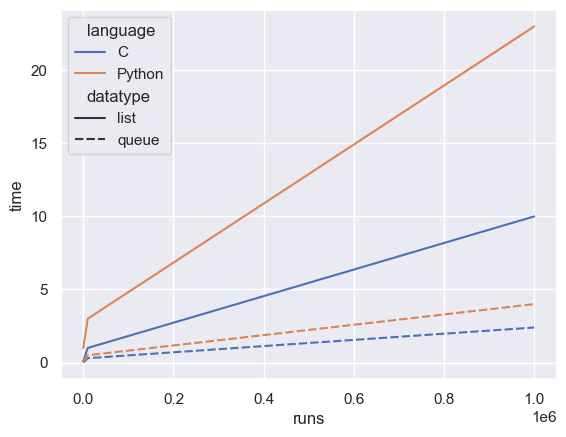

In [16]:
# same dataframe
# now passing parameters to us define what data winds up being used for axes, coloring, etc.
sns.lineplot(data=stats_df, y="time", x="runs", hue="language", style="datatype")

<AxesSubplot: xlabel='runs_log_10', ylabel='time'>

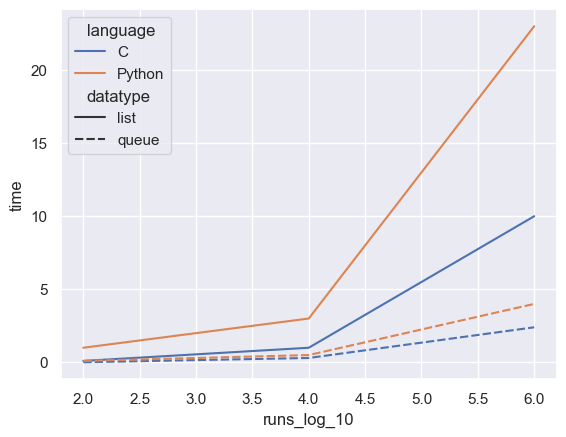

In [15]:
import numpy as np

# set default seaborn theme
sns.set_theme()

# modify some data in place using log10 UFunc
stats_df["runs_log_10"] = np.log10(stats_df["runs"])
sns.lineplot(data=stats_df, y="time", x="runs_log_10", hue="language", style="datatype",)

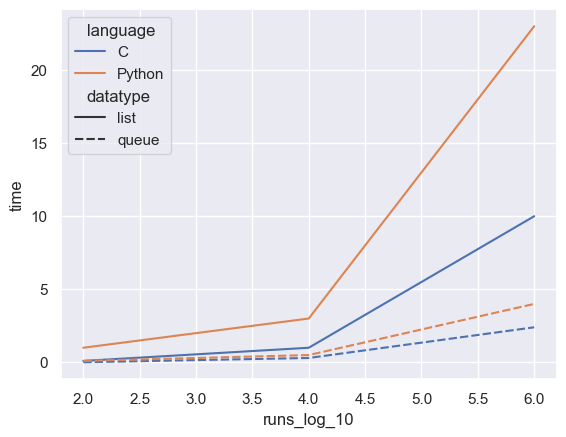

In [20]:
# saving a plot to a file
import matplotlib.pyplot as plt
fig = sns.lineplot(data=stats_df, y="time", x="runs_log_10", hue="language", style="datatype",)
plt.savefig('perf.png')

In [22]:
!!ls perf.png

['perf.png']

## 

## Other Libraries

- polars - https://pola.rs/ - Fast data manipulation (new competitor to pandas)
- SciPy - https://www.scipy.org/ - Integration, optimization, linear algebra, etc.
- scikit-learn - https://scikit-learn.org/stable/ - Machine learning
- statsmodels - https://www.statsmodels.org/stable/index.html - Statistical modeling
- PyMC3 - https://docs.pymc.io/ - Probabilistic programming
- TensorFlow - https://www.tensorflow.org/ - Deep learning
- PyTorch - https://pytorch.org/ - Deep learning
- Keras - https://keras.io/ - Deep learning
- NLTK - https://www.nltk.org/ - Natural language processing
- gensim - https://radimrehurek.com/gensim/ - Natural language processing
- spaCy - https://spacy.io/ - Natural language processing
- OpenCV - https://opencv.org/ - Computer vision

## Improving Performance

1) Understand what is slow.  Use `timeit` or `cProfile` to profile your code.

- https://docs.python.org/3/library/timeit.html
- https://docs.python.org/3/library/profile.html

_"Premature optimization is the root of all evil."_

2) Can the **critical path** be done in a different way?  (Minimize operations, use appropriate data structures, etc.)

3) Can it be vectorized?  (Use NumPy, ufuncs, etc.)

- https://numpy.org/doc/stable/reference/ufuncs.html

4) Can it be parallelized?  (Use `multiprocessing`, `asyncio`, etc.)

- https://docs.python.org/3/library/multiprocessing.html
- https://docs.python.org/3/library/asyncio.html

4) Consider using a bridge to a faster language (Cython, PyO3, CFFI, etc.)

- Cython - https://cython.org/
- PyO3 - https://pyo3.rs/
- CFFI - https://cffi.readthedocs.io/en/latest/
